In [42]:
print(odd)

{8, 9, 6, 7}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
target = train.iloc[:,-1]
train.drop(['id','target'], axis = 1, inplace = True)

In [5]:
scaler = MinMaxScaler()
# min_max 값 학습
scaler.fit(train)
train=scaler.transform(train)
train = pd.DataFrame(train)

In [6]:
train_corr=train.corr()
train_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,1.000000,0.031332,-0.027807,-0.027529,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
1,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
2,-0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
3,-0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
4,0.042973,0.020926,0.010880,0.017290,1.000000,0.145355,0.075047,0.035861,-0.024708,0.091324,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038


In [7]:
b = []
for i in train_corr.columns:
    for j in train_corr.index:
        if train_corr.loc[j,i] > 0.5 and train_corr.loc[j,i] != 1:
            print(f'columns : {i} and index {j}', train_corr.loc[j,i])
            b.append(i)

columns : 1 and index 89 0.515021939787838
columns : 2 and index 3 0.5835232203459249
columns : 2 and index 10 0.5962430076613688
columns : 2 and index 26 0.5083695809016442
columns : 2 and index 27 0.5513979091523036
columns : 2 and index 45 0.7775172869087756
columns : 2 and index 53 0.6940483715101846
columns : 3 and index 2 0.5835232203459249
columns : 3 and index 34 0.5544741429334893
columns : 3 and index 53 0.525455656743003
columns : 6 and index 77 0.5670836123120604
columns : 7 and index 35 0.606706773376812
columns : 8 and index 31 0.5684174196578917
columns : 8 and index 63 0.7029513594531267
columns : 10 and index 2 0.5962430076613688
columns : 10 and index 26 0.5994842086997451
columns : 10 and index 45 0.5792721477422468
columns : 10 and index 60 0.5438583070296544
columns : 10 and index 79 0.5618432241507125
columns : 13 and index 24 0.5579287428125167
columns : 14 and index 71 0.7646636230211049
columns : 21 and index 53 0.5021678096523746
columns : 24 and index 13 0.55

In [8]:
b = set(b)
print(b)

{1, 2, 3, 6, 7, 8, 10, 13, 14, 21, 24, 26, 27, 28, 29, 30, 31, 34, 35, 38, 44, 45, 51, 53, 60, 63, 68, 71, 73, 76, 77, 79, 81, 83, 89}


In [9]:
a = []
for i in train_corr.columns:
    for j in train_corr.index:
        if train_corr.loc[j,i] < 0.5 and train_corr.loc[j,i] != 1 and train_corr.loc[j,i] > 0.3 :
            print(f'columns : {i} and index {j}', train_corr.loc[j,i])
            a.append(i)

columns : 1 and index 19 0.44916038441283174
columns : 1 and index 37 0.37302233895650383
columns : 1 and index 48 0.31127813314715314
columns : 1 and index 57 0.3711461523106813
columns : 1 and index 68 0.30740639944832043
columns : 1 and index 82 0.3716909006931929
columns : 2 and index 20 0.35492469116050923
columns : 2 and index 60 0.494880764442934
columns : 2 and index 79 0.44203598742813244
columns : 2 and index 81 0.43845757151026077
columns : 3 and index 10 0.3894092253159951
columns : 3 and index 25 0.365756733673347
columns : 3 and index 26 0.30862866864110367
columns : 3 and index 27 0.4864170895737172
columns : 3 and index 30 0.35126273747374553
columns : 3 and index 45 0.4362735264590777
columns : 3 and index 48 0.3000109026630116
columns : 3 and index 60 0.35440227657429185
columns : 3 and index 79 0.40577246342986917
columns : 3 and index 81 0.4365412861584727
columns : 4 and index 29 0.3181169460914256
columns : 4 and index 83 0.467328503745839
columns : 6 and index 19

columns : 65 and index 21 0.38238461294920545
columns : 65 and index 61 0.34252316384526477
columns : 66 and index 7 0.320948727001745
columns : 66 and index 16 0.30651311454012176
columns : 66 and index 23 0.43501746037928535
columns : 66 and index 31 0.3780906556470837
columns : 66 and index 35 0.42954312448941734
columns : 66 and index 47 0.4073499880968055
columns : 66 and index 58 0.39883733984013625
columns : 66 and index 75 0.3236778553861456
columns : 68 and index 1 0.30740639944832043
columns : 68 and index 18 0.3976207321687022
columns : 68 and index 19 0.34832658077526446
columns : 68 and index 23 0.4191431769292554
columns : 68 and index 37 0.3014305713968447
columns : 68 and index 57 0.39283920223792024
columns : 68 and index 75 0.40969054244262365
columns : 69 and index 9 0.3228571407100438
columns : 69 and index 19 0.3164356390336502
columns : 69 and index 37 0.40917501181869775
columns : 69 and index 42 0.321611257999562
columns : 69 and index 43 0.3848384710159701
colu

In [10]:
a=set(a)
print(a)

{1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 37, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 68, 69, 70, 71, 75, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92}


In [11]:
a = a-b
print(a)

{4, 9, 12, 15, 16, 17, 18, 19, 20, 23, 25, 32, 37, 39, 41, 42, 43, 46, 47, 48, 49, 52, 54, 56, 57, 58, 59, 61, 65, 66, 69, 70, 75, 78, 82, 84, 85, 86, 87, 88, 91, 92}


In [12]:
a = a.union(b)

In [13]:
a = list(a)

In [14]:
b = [90,62,55,22,74,72,40,67,33,50,80]

In [15]:
for i in b:
    a.append(i)

In [16]:
train_a=train[a]

In [17]:
le =LabelEncoder()
target=le.fit_transform(target)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_a, target, test_size = 0.2, random_state = 42)
print('X_train의 형태' , X_train.shape)
print('X_test의 형태' , X_test.shape)
print('y_train의 형태' , y_train.shape)
print('y_test의 형태' , y_test.shape)

X_train의 형태 (49502, 88)
X_test의 형태 (12376, 88)
y_train의 형태 (49502,)
y_test의 형태 (12376,)


In [19]:
gbc=GradientBoostingClassifier(learning_rate=0.01)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
np.mean(y_test == y_pred)

0.7080639948287007

In [20]:
clf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth=100, random_state = 10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
np.mean(y_test == y_pred)

0.8110859728506787

In [21]:
# knn
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
print('accracy : {:.2f}'.format(knn.score(X_test, y_test)))

accracy : 0.77


In [22]:
# logistic
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
np.mean(y_test == y_pred)

0.7399806076276665

# 마지막 상관관계로 분석

In [23]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,0.033333,...,0.289474,0.000000,0.015385,0.029851,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.0,0.007692,0.0,0.0,0.0


In [24]:
train_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,1.000000,0.031332,-0.027807,-0.027529,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
1,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
2,-0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
3,-0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
4,0.042973,0.020926,0.010880,0.017290,1.000000,0.145355,0.075047,0.035861,-0.024708,0.091324,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038


In [25]:
set(range(len(train.columns)))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92}

In [26]:
columns=set(set(range(len(train.columns))))
a=set(a)
sub_columns=columns - a

In [27]:
sub_columns

{0, 5, 11, 36, 64}

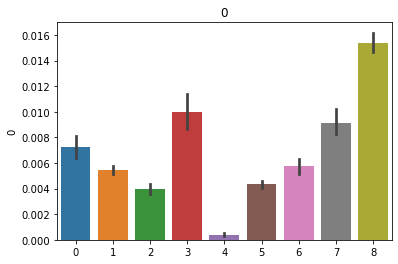

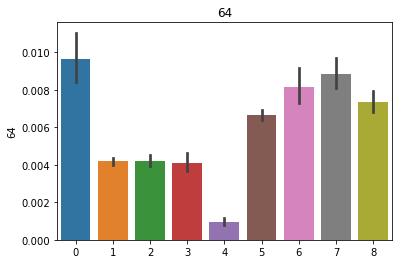

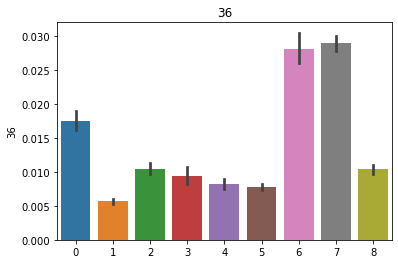

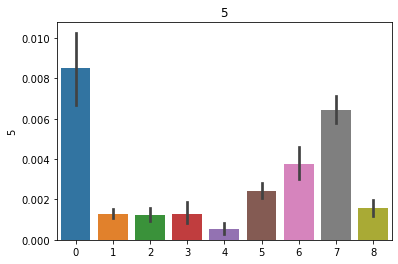

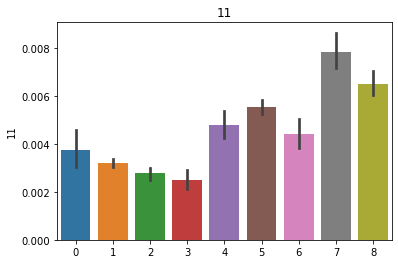

In [28]:
for i in sub_columns:
    sns.barplot(y = train[i], x = target)
    plt.title(f'{i}')
    plt.show()